<a href="https://colab.research.google.com/github/beyzaatasever/Molecular-Descriptors-for-Predicting-Electronic-Structure/blob/main/Hidden_Layers_400.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
import re

# Specify the folder path
folder_path = "/content/gdrive/MyDrive/coulomb_matrix_only_2000_data"

# Get a list of all file names in the folder
file_names = os.listdir(folder_path)

# Filter only the .txt files
txt_files = [file for file in file_names if file.endswith(".txt")]

# Sort the .txt files based on the numerical order in the second position
sorted_txt_files = sorted(txt_files, key=lambda x: int(re.search(r'(\d+)', x.split('_')[1]).group()))

# Initialize an empty list to store DataFrames for each file
data_frames = []

# Loop through each file in the sorted list
for file_name in sorted_txt_files:
    # Construct the full path to the file
    file_path = os.path.join(folder_path, file_name)

    # Load each file into a DataFrame
    df = pd.read_csv(file_path, header=None, delimiter='\t')  # Assuming tab-separated values
    data_frames.append(df.T)  # Transpose to have each file as a row

# Concatenate all DataFrames into a single DataFrame
all_data = pd.concat(data_frames, ignore_index=True)

# Display the shape of the resulting DataFrame
print("Shape of the concatenated DataFrame:", all_data.shape)


Shape of the concatenated DataFrame: (1999, 841)


In [ ]:
X = all_data
print("Input in matrix form:\n", X)

# shape of input matrix
print("\nShape of Input Matrix:", X.shape)

Input in matrix form:
             0          1          2          3          4          5    \
0     36.858105   5.494742   5.494749   5.494775   5.494769   5.494742   
1      0.500000   0.617847   0.617776   0.617847   0.500000   0.617778   
2      0.500000   0.660782   0.660782   0.500000   0.000000   0.000000   
3     36.858105  30.023043   2.653484   5.649190  30.023043  36.858105   
4     36.858105   5.625362   5.625362   0.500000   0.000000   0.000000   
...         ...        ...        ...        ...        ...        ...   
1994  36.858105  23.449081  14.234582  14.100864  11.528495   8.482216   
1995  36.858105  23.474786  14.202714  14.194764   8.858923   8.107101   
1996  36.858105  23.517980  14.189944  11.783203   8.365461  10.512860   
1997  36.858105  23.534737  14.175832   9.224745   7.467330   6.996466   
1998  36.858105  23.558946  14.160865   9.267578   7.105905   5.479289   

           6         7         8         9    ...  831  832  833  834  835  \
0     0.50

In [ ]:
# Print the name of the first file in the sorted list
if sorted_txt_files:
    first_file_name = sorted_txt_files[0]
    print("Name of the first file:", first_file_name)
else:
    print("No .txt files found.")


Name of the first file: dsgdb9nsd_000001_coordinates_coulomb_matrix.txt


In [ ]:
import os
import pandas as pd
import re
import numpy as np
# Specify the path to your output data file
output_file_path = '/content/homolumo_values.txt'

# Read the output file line by line and extract the eV numbers
output_data = []

with open(output_file_path, 'r') as file:
    for lines in file:
        elements = lines.split()
        output_data.append(float(elements[4]))

# Convert the list to a numpy array
output_data = np.array(output_data)
output_data = output_data[:1999]  # Use the first 1999 data points


In [ ]:
# Print the first 10 values of output_data
print(output_data[:10])

# Alternatively, print the last 10 values
print(output_data[-10:])


[ 6.469  6.316  6.002  8.574  6.278  6.413 10.098  8.751 12.482 10.287]
[26.374 27.301 25.817 23.818 31.65  29.939 30.6   30.379 30.518 28.804]


In [ ]:
# Print the shape of the output_data
print("Shape of output_data:", output_data.shape)


Shape of output_data: (1999,)


In [ ]:
pip install numpy scikit-learn keras


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, output_data, test_size=0.8, random_state=42)

In [ ]:
# Standardize the input data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# Print sizes for checking
print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)
print("Size of y_train:", y_train.shape)
print("Size of y_test:", y_test.shape)

Size of X_train: (399, 841)
Size of X_test: (1600, 841)
Size of y_train: (399,)
Size of y_test: (1600,)


In [ ]:
# Create a Sequential model
model = Sequential()
# Add input layer
model.add(Dense(units=64, activation='relu', input_dim=841))  # Assuming 841 features in your Coulomb matrix

In [ ]:
# Add hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

In [ ]:
# Add output layer
model.add(Dense(units=1, activation='linear'))  # Output layer for regression


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Use appropriate optimizer and loss function

In [ ]:
# Train the model
model.fit(X, output_data, epochs=50, batch_size=32, validation_split=0.2)  # Adjust parameters as needed

Epoch 1/50
50/50 [==============================] - 4s 28ms/step - loss: 106.3636 - val_loss: 19.4001
Epoch 2/50
50/50 [==============================] - 1s 12ms/step - loss: 21.8471 - val_loss: 15.5913
Epoch 3/50
50/50 [==============================] - 0s 10ms/step - loss: 17.0017 - val_loss: 13.6966
Epoch 4/50
50/50 [==============================] - 0s 9ms/step - loss: 14.1730 - val_loss: 10.9957
Epoch 5/50
50/50 [==============================] - 1s 10ms/step - loss: 11.9147 - val_loss: 10.3973
Epoch 6/50
50/50 [==============================] - 1s 12ms/step - loss: 10.7018 - val_loss: 11.3058
Epoch 7/50
50/50 [==============================] - 1s 10ms/step - loss: 10.3841 - val_loss: 8.5464
Epoch 8/50
50/50 [==============================] - 1s 11ms/step - loss: 9.1480 - val_loss: 9.1593
Epoch 9/50
50/50 [==============================] - 1s 10ms/step - loss: 9.3321 - val_loss: 7.2082
Epoch 10/50
50/50 [==============================] - 0s 5ms/step - loss: 9.0057 - val_loss: 6.38

In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

50/50 [==============================] - 0s 2ms/step - loss: 4.9658
Test Loss: 4.965785503387451


In [ ]:
# Make predictions
predictions = model.predict(X_test)
# You can use predictions for further analysis or comparison

50/50 [==============================] - 1s 7ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate additional evaluation metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4.96578499899272
R-squared: 0.791516027687041


hyperparameter demo



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X is your input (Coulomb matrix) and output_data is your output (HOMO-LUMO gaps)
X = all_data  # Replace this with your Coulomb matrix data
output_data = output_data  # Replace this with your HOMO-LUMO gaps data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, output_data, test_size=0.2, random_state=42)

def create_model(optimizer='adam', activation='relu', units=16, num_layers=3, nodes_per_layer=[64, 32, 16]):
    model = Sequential()
    model.add(Dense(units=nodes_per_layer[0], activation=activation, input_dim=841))

    # Repeat elements in nodes_per_layer to match num_layers
    repeated_nodes = nodes_per_layer * (num_layers // len(nodes_per_layer)) + nodes_per_layer[:num_layers % len(nodes_per_layer)]

    for nodes in repeated_nodes[1:]:
        model.add(Dense(units=nodes, activation=activation))

    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


# Specify the hyperparameters you want to tune
optimizers = ['adam']
activations = ['relu', 'tanh']
units_values = [16, 32, 64]
num_layers_values = [2, 3, 4]
nodes_per_layer_values = [[64, 32], [32, 16], [64, 32, 16]]

best_model = None
best_loss = float('inf')

# Loop through hyperparameter combinations
for optimizer in optimizers:
    for activation in activations:
        for units in units_values:
            for num_layers in num_layers_values:
                for nodes_per_layer in nodes_per_layer_values:
                    # Create a model with current hyperparameters
                    model = create_model(optimizer=optimizer, activation=activation, units=units, num_layers=num_layers, nodes_per_layer=nodes_per_layer)

                    # Train the model
                    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

                    # Evaluate the model
                    loss = model.evaluate(X_test, y_test)
                    print(f'Hyperparameters: optimizer={optimizer}, activation={activation}, units={units}, num_layers={num_layers}, nodes_per_layer={nodes_per_layer}, Test Loss: {loss}')

                    # Update best model if current model has lower loss
                    if loss < best_loss:
                        best_loss = loss
                        best_model = model

# Print information about the best model
print(f'Best Test Loss: {best_loss}')


13/13 [==============================] - 0s 3ms/step - loss: 6.4244
Hyperparameters: optimizer=adam, activation=relu, units=16, num_layers=2, nodes_per_layer=[64, 32], Test Loss: 6.424386024475098
13/13 [==============================] - 1s 75ms/step - loss: 7.4439
Hyperparameters: optimizer=adam, activation=relu, units=16, num_layers=2, nodes_per_layer=[32, 16], Test Loss: 7.443921089172363
13/13 [==============================] - 1s 78ms/step - loss: 6.6704
Hyperparameters: optimizer=adam, activation=relu, units=16, num_layers=2, nodes_per_layer=[64, 32, 16], Test Loss: 6.670433521270752
13/13 [==============================] - 0s 16ms/step - loss: 7.1442
Hyperparameters: optimizer=adam, activation=relu, units=16, num_layers=3, nodes_per_layer=[64, 32], Test Loss: 7.144184112548828
13/13 [==============================] - 1s 75ms/step - loss: 7.3503
Hyperparameters: optimizer=adam, activation=relu, units=16, num_layers=3, nodes_per_layer=[32, 16], Test Loss: 7.350301742553711
13/13 [

13/13 [==============================] - 0s 2ms/step


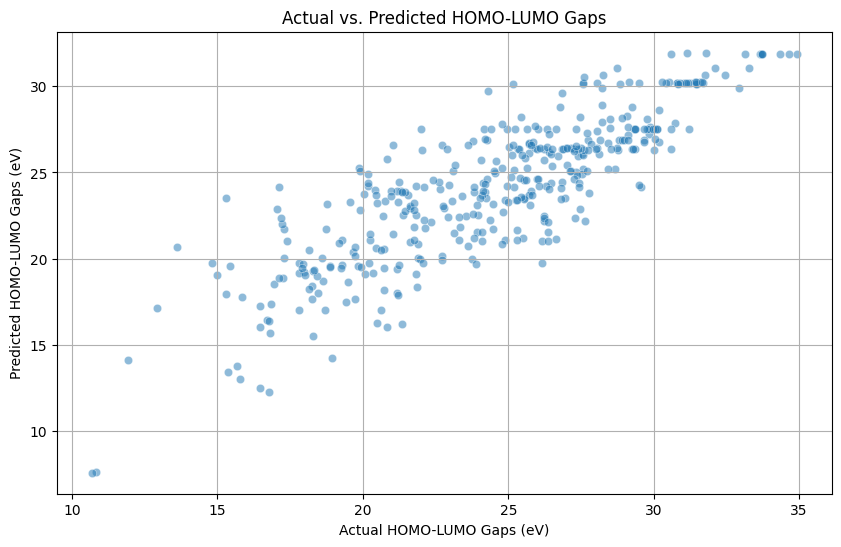

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code remains unchanged)

# Make predictions on the test set
predictions = model.predict(X_test)

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions.flatten(), alpha=0.5)
plt.title('Actual vs. Predicted HOMO-LUMO Gaps')
plt.xlabel('Actual HOMO-LUMO Gaps (eV)')
plt.ylabel('Predicted HOMO-LUMO Gaps (eV)')
plt.grid(True)
plt.show()
